In [3]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Normalization
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Flatten
from keras import layers
pd.set_option('display.max_rows', 50)
from tensorflow.keras import optimizers


2021-08-31 09:19:27.196319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-31 09:19:27.196381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
df_merged = pd.read_csv("data_final_20210826_v1.csv")

In [5]:
df_merged.iloc[460:]

,tweet_date,party,poll,reply_count,retweet_count,like_count,avg_len_of_tweet,avg_followers_count,avg_following_count,avg_user_tweet_count,avg_ff_ratio,share_of_tweets,share_unique_users,weighted_sentiment,share_of_positive_tweets,share_of_negative_tweets
460,2021-07-30,OTHER,7.33,2635.0,3883.0,23901.0,167.194377,950.716381,691.559087,14127.194784,1.374744,0.073431,0.627139,0.147255,0.077832,0.328851
461,2021-07-30,SPD,16.33,4419.0,4506.0,41132.0,168.444372,3084.162186,915.753224,29096.511257,3.367897,0.136898,0.673880,-0.376827,0.051148,0.468634
462,2021-07-31,AFD,11.17,3656.0,4719.0,28514.0,175.035764,8991.022353,739.160659,21462.787091,12.163827,0.155150,0.654652,-0.658055,0.065940,0.551271
463,2021-07-31,CDU,27.33,5451.0,8435.0,61975.0,175.515379,5703.071670,847.149375,24929.225460,6.732073,0.294564,0.629875,-0.310445,0.040177,0.443561
464,2021-07-31,FDP,12.33,4611.0,8075.0,50840.0,189.091832,3687.603682,723.330512,23621.121244,5.098089,0.204873,0.637325,-0.103421,0.052264,0.392510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,2021-08-26,FDP,12.00,7423.0,9063.0,63348.0,178.698807,4663.179284,690.310107,20607.243817,6.755195,0.193819,0.638167,-0.149995,0.062775,0.406026
647,2021-08-26,GRUENE,18.00,3976.0,3199.0,29066.0,155.032074,3785.480448,749.313049,17960.210457,5.051935,0.110768,0.716828,-0.577197,0.056459,0.527460
648,2021-08-26,LINKE,7.00,887.0,713.0,5282.0,190.801338,963.538462,684.646823,20400.862207,1.407351,0.036379,0.590635,-0.134164,0.060201,0.400669
649,2021-08-26,OTHER,6.00,1550.0,2166.0,11618.0,175.401146,1340.969436,638.417861,14171.402579,2.100457,0.050955,0.579752,-0.129097,0.087393,0.409742


In [6]:
df_merged.shape

(651, 16)

In [7]:
df_merged["tweet_date"] = pd.to_datetime(df_merged["tweet_date"])

In [8]:
df_merged = df_merged.groupby([pd.Grouper(key='tweet_date',freq='D'), "party"]).agg({
    "reply_count": "sum", 
    "retweet_count": "sum",
    "like_count": "sum",
    "avg_len_of_tweet": "mean" ,
    "avg_followers_count": "mean" ,
    "avg_following_count": "mean" ,
    "avg_user_tweet_count" :"mean",
    "avg_ff_ratio" :"mean",
    "share_of_tweets" :"mean",
    "share_unique_users": "mean",
    "weighted_sentiment" : "mean",
    "share_of_positive_tweets": "mean",
    "share_of_negative_tweets" : "mean",
    "poll": "mean"}) 

In [9]:
df_merged.shape

(651, 14)

In [10]:
df_merged = df_merged.replace(np.nan, -9999)

In [11]:
model = Sequential()
model.add(layers.Masking(mask_value=-9999., input_shape=(7,14)))
model.add(layers.LSTM(units=64, activation='tanh', return_sequences=True))
model.add(layers.LSTM(units=32, activation='tanh', return_sequences=False))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(7, activation='linear'))


2021-08-31 09:19:41.021545: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-31 09:19:41.021627: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-31 09:19:41.021646: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-69AIGBNI): /proc/driver/nvidia/version does not exist
2021-08-31 09:19:41.021958: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 7, 14)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 7, 64)             20224     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 50)                1650      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 34,647
Trainable params: 34,647
Non-trainable params: 0
_________________________________________________________________


In [13]:
df_merged = df_merged.iloc[:-7]

In [14]:
df_merged["poll"][21:28]

tweet_date  party 
2021-05-29  AFD       12.0
            CDU       25.0
            FDP       13.0
            GRUENE    22.0
            LINKE      7.0
            OTHER      5.0
            SPD       16.0
Name: poll, dtype: float64

In [15]:
round(len(df_merged) * 0.80)

515

In [16]:
df_merged.columns

Index(['reply_count', 'retweet_count', 'like_count', 'avg_len_of_tweet',
       'avg_followers_count', 'avg_following_count', 'avg_user_tweet_count',
       'avg_ff_ratio', 'share_of_tweets', 'share_unique_users',
       'weighted_sentiment', 'share_of_positive_tweets',
       'share_of_negative_tweets', 'poll'],
      dtype='object')

In [17]:
df_merged[8:9].index[0][1] == "CDU"

True

In [22]:
def splitting_data(df):
    
    split_percentage = 0.80
    split_index = round(split_percentage * len(df)) 
    
    for num in range(split_index, split_index + 7):
        if df_merged[num:(num + 1)].index[0][1] == "AFD":
            split_index = num
        else:
            pass
    df_train = df[:split_index]
    df_test = df[split_index:]
    
    return df_train, df_test

In [23]:
df_train, df_test =  splitting_data(df_merged)

In [27]:
np.random.randint(0, 21,)

array([ 3,  3, 20,  4,  7, 19, 17])

In [24]:
def subsequence(df, days):
    
    last_possible_start = len(df) - days
    days = days * 7
    random_int = np.random.randint(0, last_possible_start)
    X = df[count: days]
    y = df["poll"][days: (days+7)]
    
    return X, y

In [25]:
def multiple_subsequences(df, days):
    
    lst_X = []
    lst_y = []
    
    subsequences = round(days / len(df))
    for _ in range(subsequences):
        X_sequence, y_sequence = subsequence(df, days)
        list_of_X.append(X_sequence)
        list_of_y.append(y_sequence)
        
    
    return lst_X, lst_y

    
    
    

In [26]:
multiple_subsequences(df_train, 3)
    

([], [])

In [251]:
X_test = df_merged_test.to_numpy().reshape(1,7,14)
X_train = df_merged.to_numpy().reshape(35,7,14)
y_test = df_merged_test["poll"].to_numpy().reshape(1,7,1)
y_train = y.to_numpy().reshape(93,7)

In [271]:
%%time

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(X_train, y_train ,
          epochs=50, 
          batch_size=1, 
          verbose=1, 
          validation_split=0.2,
          shuffle = False
     )



Epoch 1/50
28/28 [==============================] - 17s 127ms/step - loss: 0.7875 - mae: 0.6965 - val_loss: 1.3689 - val_mae: 0.9430
Epoch 2/50
28/28 [==============================] - 0s 17ms/step - loss: 0.7234 - mae: 0.6699 - val_loss: 1.8078 - val_mae: 1.0628
Epoch 3/50
28/28 [==============================] - 0s 18ms/step - loss: 0.7369 - mae: 0.6852 - val_loss: 1.5429 - val_mae: 0.9943
Epoch 4/50
28/28 [==============================] - 0s 17ms/step - loss: 0.7258 - mae: 0.6698 - val_loss: 1.7489 - val_mae: 1.0449
Epoch 5/50
28/28 [==============================] - 1s 18ms/step - loss: 0.6969 - mae: 0.6595 - val_loss: 1.5634 - val_mae: 1.0090
Epoch 6/50
28/28 [==============================] - 1s 18ms/step - loss: 0.7023 - mae: 0.6606 - val_loss: 1.6743 - val_mae: 1.0298
Epoch 7/50
28/28 [==============================] - 0s 17ms/step - loss: 0.6752 - mae: 0.6482 - val_loss: 1.5538 - val_mae: 0.9961
Epoch 8/50
28/28 [==============================] - 0s 16ms/step - loss: 0.6777 -

In [272]:
model.evaluate(x = X_test, y= y_test )

1/1 [==============================] - 3s 3s/step - loss: 10.5910 - mae: 2.1697


[10.591023445129395, 2.169748544692993]

In [284]:
np.sum(pd.DataFrame(model.predict(df_merged_test_numpy)).rename( \
                        columns = {0:'AFD',1:'CDU',2:'FDP',3: 'GRUENE',4: 'LINKE', 5:'OTHER', 6: 'SPD'}).round(2))

AFD       10.200000
CDU       28.120001
FDP       13.040000
GRUENE    20.090000
LINKE      6.500000
OTHER      5.990000
SPD       15.710000
dtype: float32

In [269]:
def plot_loss_mae(history):

# --- LOSS

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model MAE')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
# --- MAE

    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

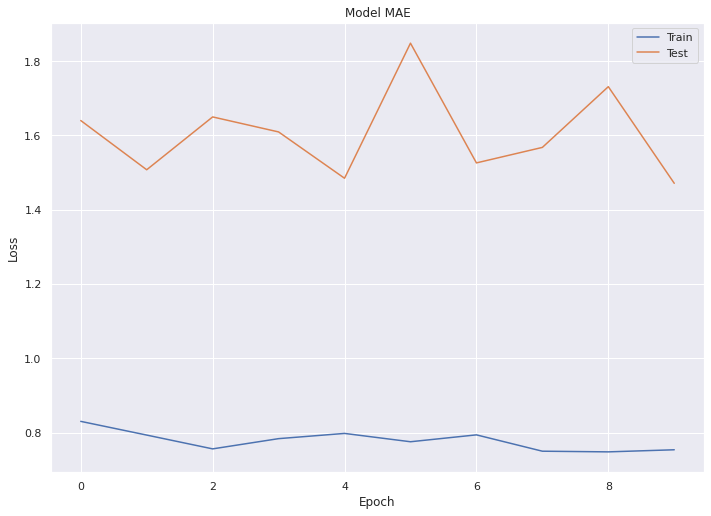

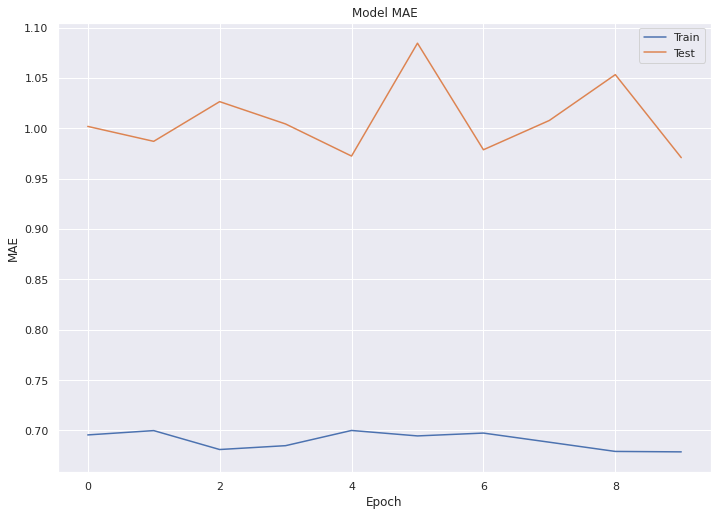

In [270]:
plot_loss_mae(history)

<AxesSubplot:xlabel='tweet_date'>

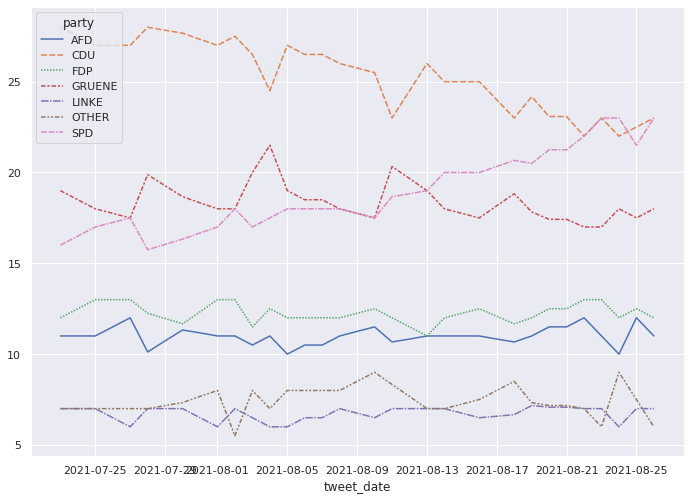

In [262]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot( data = df_merged["poll"].unstack())
